# Estmation of Raman momentum and Lamb-Dicke parameter
## Created on 14th September, 2023
## Author: Hideki Ozawa

According to [Ref.1](https://doi.org/10.1103/PhysRevA.20.1521), the coupling term for two bands of a trap with indices $n,m$ is given by
\begin{equation}
M = \bra{n} {\rm exp}(i \mathbf{k} \cdot \mathbf{x} ) \ket{m}. \tag{1}
\end{equation}
In the cause of optical transitions, the momemtnum projection is given by the photon recoil momentum.  
For a harmonic oscillator, the position operator can be expressed in terms of the ladder operators:
\begin{equation}
x = x_0 (\hat{a}+\hat{a}^{\dagger}), \tag{2}
\end{equation}
where $x_0$ is the spread of the harmonic oscillator's ground state
\begin{equation}
x_0 = \sqrt{\frac{\hbar}{2m \omega_x}} \tag{3}
\end{equation}
with $\omega_x$ is the trap frequency along the x axis, for example.  
The Lamb-Dicke parameter $\eta$ is now defined as
\begin{equation}
\eta = k_x x_0, \tag{4}
\end{equation}
and a system is considered to be in the Lamb-Dicke regime if $\eta \gg 1$.  
As in [Ref.1](https://doi.org/10.1103/PhysRevA.20.1521) and [Ref.2](https://doi.org/10.48550/arXiv.quant-ph/9710025), the resulting coupling using Eq.(2,4) can be give as
\begin{equation}
M = {\rm exp}\left( -\frac{\eta^2}{2} \right) \sqrt{\frac{n!}{m!}}\eta^{m-n} L_n^{m-n}(\eta^2), \tag{5}
\end{equation}
for the case of $m>n$. $L_n(x)$ are the Laguerre polynomials. In the Lamb-Dicke regime, the higher order terms of $m-n \ge 2$ become negligibly small. As a result, the coupling can be approximated by
\begin{equation}
\begin{array}{lll}
M = \eta \sqrt{n} \quad &{\rm for}& \quad n \rightarrow n-1 \\ \tag{6}
M = 1 - \frac{2n+1}{2} \eta^2 \quad &{\rm for}& \quad n \rightarrow n \\
M = \eta \sqrt{n+1} \quad &{\rm for}& \quad n \rightarrow n+1.\\
\end{array}
\end{equation}
The total coupling for optical transitions incorpolating sidebands is given yb the product of the coupling between vibrational states and the optical coupling. This can be expressed as the effective Rabi frequency
\begin{equation}
\Omega_{\rm eff} = M \Omega_0, \tag{7}
\end{equation}
where $\Omega_0$ is the bare Rabi frequency.

![Figure.1](fig/RamanSidebandCoolingScheme.png)
**Figure 1** Simplified scheme of Raman sideband cooling of <sup>171</sup>Yb using 556 nm lasers. (a) Raman transition from $\ket{n} \rightarrow \ket{n-1}$, where $n$ means the vibrational level. (b) Initialization of the internal state using a repump laser. (c) Definition of the coordinate. Atoms trapped in tweezers are aligned along y axis. Standing waves are formed due to reflection of tweezers at the nanofiber. Because of this, the trap frequency along z axis is a few times larger than those in xy plane.

Figure 1(a,b) illustrates the simplified scheme of Raman sideband cooling for <sup>171</sup>Yb using 556 nm lasers. Figure 1(c) defines the coordinate used throughout this code.

Optimal Lamb-Dicke parameters are supposed to be in the range of $0.1<\eta<0.3$; A too large $\eta$ violates the Lamb-Dicke condition of $\eta^2 \ll 1$, while a too small $\eta$ leads to a small $\Omega_{\rm eff}$, which would make the Raman sideband cooling very slow.

## Libraries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import astropy.units as u
from regions import PixCoord, PolygonSkyRegion, PolygonPixelRegion
from regions import RegularPolygonPixelRegion, CirclePixelRegion, RectanglePixelRegion

## Physical constants

In [2]:
#@title [Fundamental physical constants (2006 CODATA)](https://physics.nist.gov/cuu/Constants/RevModPhys_80_000633acc.pdf)
c = 2.99792458 * 1e8 # Speed of Light (m/s)
mu_0 = 2 * np.pi * 1e-7 # Permeability of Vacuum (N/A^2)
epsilon_0 = 1 / (mu_0 * c**2) # Permittivity of Vacuum (F/m)
h = 6.62606896 * 1e-34 # Planck constant (J/Hz)
hbar = 6.62606896 * 1e-34 / (2 * np.pi) # Dirac constant (J/Hz)
e = 1.602176487 * 1e-19 # Elementary Charge (C)
mu_B = 9.27400915 * 1e-24 # Bohr Magneton (J/G)
mass_u = 1.660538782 * 1e-27 # Atomic Mass Unit (kg)
mass_e = 9.10938215 * 1e-31 # Electron Mass (kg)
a0 = 0.52917720859 * 1e-10 # Bohr Radius (m)
kB = 1.3806504 * 1e-23 # Boltzmann constant (J/K)

In [3]:
mass_atom = mass_u * 171 # mass of 171Yb atom
wavelength_D1 = 556 * 1e-9 # [m]

k_D1 = 2 * np.pi / wavelength_D1 # 1/m

## Parameters

### Trap frequencies

In [12]:
#Trap frequencies
omega_x = 100 # [kHz]
omega_y = 100 # [kHz]
omega_z = 300 # [kHz]

omega_x *= 1e3
omega_y *= 1e3
omega_z *= 1e3

a_x = np.sqrt(hbar / (2 * mass_atom * 2 * np.pi * omega_x))
a_y = np.sqrt(hbar / (2 * mass_atom * 2 * np.pi * omega_y))
a_z = np.sqrt(hbar / (2 * mass_atom * 2 * np.pi * omega_z))

### Raman beam parameters

In [16]:
theta_R1 = 90 #[degree] polar angle of Raman1 (min:0, max:180)
phi_R1 = 45 #[degree] azimuthal angle of Raman1 (min:0, max:360)
theta_R2 = 135 #[degree] polar angle of Raman2 (min:0, max:180)
phi_R2 = -180 #[degree] azimuthal angle of Raman2 (min:0, max:360)

In [17]:
phi_R1 = phi_R1 - 90
phi_R2 = phi_R2 - 90

k_R1 = np.array([np.sin(np.pi * theta_R1 / 180) * np.cos(np.pi * phi_R1 / 180),
                 np.sin(np.pi * theta_R1 / 180) * np.sin(np.pi * phi_R1 / 180),
                 np.cos(np.pi * theta_R1 / 180)])
k_R2 = np.array([np.sin(np.pi * theta_R2 / 180) * np.cos(np.pi * phi_R2 / 180),
                 np.sin(np.pi * theta_R2 / 180) * np.sin(np.pi * phi_R2 / 180),
                 np.cos(np.pi * theta_R2 / 180)])

dk_R = k_R1 - k_R2

print("k_R1", k_R1)
print("k_R2", k_R2)
print("dk_R", dk_R)
print("eta", dk_R*k_D1*np.array([a_x,a_y,a_z]))

k_R1 [ 7.07106781e-01 -7.07106781e-01  6.12323400e-17]
k_R2 [-1.29893408e-16  7.07106781e-01 -7.07106781e-01]
dk_R [ 0.70710678 -1.41421356  0.70710678]
eta [ 0.13737276 -0.27474552  0.0793122 ]


Text(0.5, 1.0, '$\\theta_{R1} = 90.0^\\circ$, $\\theta_{R2} = 135.0^\\circ$\n$\\Delta \\mathbf{k}_R$ = (7.99, 15.98, 7.99) $\\mu m^{-1}$\n$(\\eta_x, \\eta_y, \\eta_z) = (0.137, 0.275, 0.079)$')

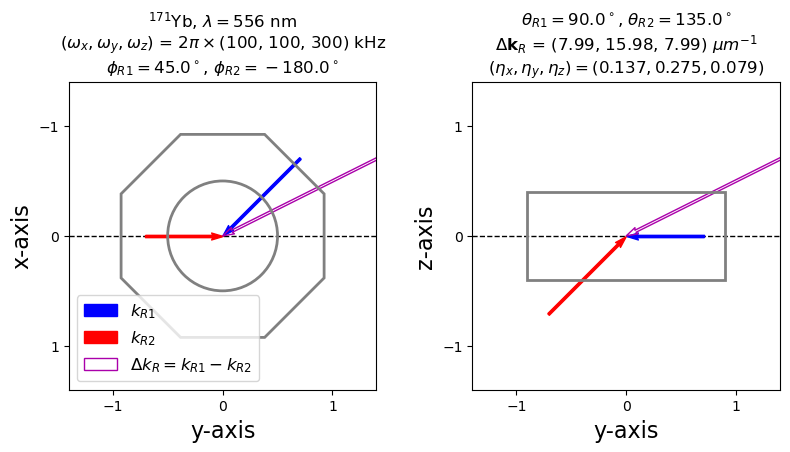

In [18]:
dk_Rs = k_D1*np.abs(dk_R)
a_xyz = np.array([a_x, a_y, a_z])
eta_LD = dk_Rs * a_xyz

labelsize=16
xmin=-1.4
xmax=-xmin
ymin=xmin
zmin=xmin
ymax=xmax
zmax=xmax

fig =plt.figure(figsize=[8,5],dpi = 100)
ax1 = fig.add_subplot(1,2,1)
ax1.hlines(y=0,xmin=xmin,xmax=xmax, linestyles='--',linewidth=1,zorder=0)
ax1.quiver(-k_R1[1], -k_R1[0], k_R1[1], k_R1[0], color='blue', angles='xy', scale_units='xy',scale=1,linewidth=1, edgecolor='blue',label="$k_{R1}$")
ax1.quiver(-k_R2[1], -k_R2[0], k_R2[1], k_R2[0], color='red', angles='xy', scale_units='xy', scale=1, linewidth=1, edgecolor='red', label="$k_{R2}$")
ax1.quiver(-dk_R[1], -dk_R[0], dk_R[1], dk_R[0], color='#aa00aa', angles='xy', scale_units='xy', scale=1, edgecolor='#aa00aa',linewidth=1, fc='None',label="$\Delta k_{R} = k_{R1} - k_{R2}$")
ax1.set_aspect('equal')
center=PixCoord(0,0)
region1_pix = CirclePixelRegion(center,radius=0.5)
region1_pix.plot(ax=ax1, color='gray', lw=2, linestyle='-')
region2_pix = RegularPolygonPixelRegion(center, 8, 1,angle=180/8*u.deg)
region2_pix.plot(ax=ax1, color='gray', lw=2, linestyle = '-')



ax1.set_xlim([xmin, xmax])
ax1.set_ylim([ymax, ymin])
ax1.xaxis.set_ticks(np.linspace(-1,1,3))
ax1.yaxis.set_ticks(np.linspace(-1,1,3))


ax1.legend(loc='lower left',fontsize=12)

ax1.set_xlabel('y-axis',fontsize=labelsize)
ax1.set_ylabel('x-axis',fontsize=labelsize)
txt_Title = r'$^{171}$Yb, $\lambda=556$ nm' +'\n'
txt_Title += r'$(\omega_x, \omega_y, \omega_z)$ = $2 \pi \times $(%d, %d, %d) kHz' % (omega_x / 1e3, omega_y / 1e3,omega_z / 1e3)
txt_Title += '\n$\phi_{R1} = %.1f^\circ$, $\phi_{R2} = %.1f^\circ$' % (phi_R1+90, phi_R2+90)

ax1.set_title(txt_Title,fontsize=12)


ax2 = fig.add_subplot(1,2,2)
ax2.hlines(y=0,xmin=ymin,xmax=ymax, linestyles='--',linewidth=1,zorder=0)
ax2.quiver(-k_R1[1], k_R1[2], k_R1[1], -k_R1[2], color='blue', angles='xy', scale_units='xy', scale=1, linewidth=1, edgecolor='blue', label="$k_{R1}$")
ax2.quiver(-k_R2[1], k_R2[2], k_R2[1], -k_R2[2], color='red', angles='xy', scale_units='xy', scale=1, linewidth=1, edgecolor='red', label="$k_{R2}$")
ax2.quiver(-dk_R[1], dk_R[2], dk_R[1], -dk_R[2], color='#aa00aa', angles='xy', scale_units='xy', scale=1, linewidth=1, edgecolor='#aa00aa',fc='None',label="$\Delta k_{R} = k_{R1} - k_{R2}$")
ax2.set_aspect('equal')
region3_pix = RectanglePixelRegion(center, width=1.8,height=0.8)
region3_pix.plot(ax=ax2, color='gray', lw=2, linestyle = '-')
ax2.set_xlim([ymin, ymax])
ax2.set_ylim([zmin, zmax])
ax2.xaxis.set_ticks(np.linspace(-1,1,3))
ax2.yaxis.set_ticks(np.linspace(-1,1,3))
ax2.set_xlabel('y-axis',fontsize=labelsize)
ax2.set_ylabel('z-axis',fontsize=labelsize)

plt.tight_layout()
txt_Title = r'$\theta_{R1} = %.1f^\circ$, $\theta_{R2} = %.1f^\circ$' % (theta_R1, theta_R2)
txt_Title += '\n$\Delta \mathbf{k}_R$ = (%.2f, %.2f, %.2f) $\mu m^{-1}$\n' % (dk_Rs[0] / 1e6,dk_Rs[1] / 1e6, dk_Rs[2] / 1e6)
txt_Title += "$(\eta_x, \eta_y, \eta_z) = (%.3f, %.3f, %.3f)$" % (eta_LD[0], eta_LD[1], eta_LD[2])

ax2.set_title(txt_Title, fontsize=12)